USEFUL LINKS FOR DATA CLEANING:

https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?utm_source=blog&utm_medium=stockmarketpredictionarticle

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

https://www.relataly.com/stock-market-prediction-with-multivariate-time-series-in-python/1815/

In [6]:
import pandas as pd
import calendar as cd
import numpy as np
import matplotlib.pyplot as plt

## DATA EXTRACTION AND CLEANING, FORMATTING, AND PLOTTING
### Data Extraction
Putting the dow jones csv data into a dataframe

In [7]:
dowjones_stocks = pd.read_csv("ES=F.csv")
dowjones_stocks_copy = dowjones_stocks.copy()
dowjones_stocks_copy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-18,1485.25,1489.75,1462.25,1467.5,1467.5,104794.0
1,2000-09-19,1467.00,1482.75,1466.75,1478.5,1478.5,103371.0
2,2000-09-20,1478.75,1480.50,1450.25,1469.5,1469.5,109667.0
3,2000-09-21,1470.25,1474.00,1455.50,1469.5,1469.5,98528.0
4,2000-09-22,1454.75,1471.00,1436.75,1468.5,1468.5,97416.0


### Data Cleaning

The Dow Jones stock price dataset contains a number of null records typically during holidays or weekends, which are days when the stock market is closed. To clean this dataset, we will simply remove all null records. Due to the missing dates, it should be noted that the stock price forecasting model will not predict stock prices for each subsequent days. Rather, we should assume that the forecasting model will predict stock prices for the next subsequent day in which the stock price would typically be observed and recorded.

In [28]:
dowjones_stocks_cleaned = dowjones_stocks_copy.loc[dowjones_stocks_copy["Open"].isnull() == False]
dowjones_stocks_cleaned = dowjones_stocks_cleaned.reset_index(drop=True)
dowjones_stocks_cleaned

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-18,1485.25,1489.75,1462.25,1467.50,1467.50,104794.0
1,2000-09-19,1467.00,1482.75,1466.75,1478.50,1478.50,103371.0
2,2000-09-20,1478.75,1480.50,1450.25,1469.50,1469.50,109667.0
3,2000-09-21,1470.25,1474.00,1455.50,1469.50,1469.50,98528.0
4,2000-09-22,1454.75,1471.00,1436.75,1468.50,1468.50,97416.0
...,...,...,...,...,...,...,...
5126,2020-11-16,3587.00,3637.00,3586.50,3623.00,3623.00,1303941.0
5127,2020-11-17,3625.50,3630.00,3584.25,3606.75,3606.75,1268206.0
5128,2020-11-18,3604.50,3623.25,3556.50,3565.00,3565.00,1325309.0
5129,2020-11-19,3562.00,3582.75,3542.25,3580.00,3580.00,1291117.0


Check if there are any null values left in the dataset. There are none left.

In [29]:
dowjones_stocks_cleaned.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [30]:
dowjones_stocks_cleaned.to_csv("(Clean)dowjones_stocks.csv")

### Data Plotting

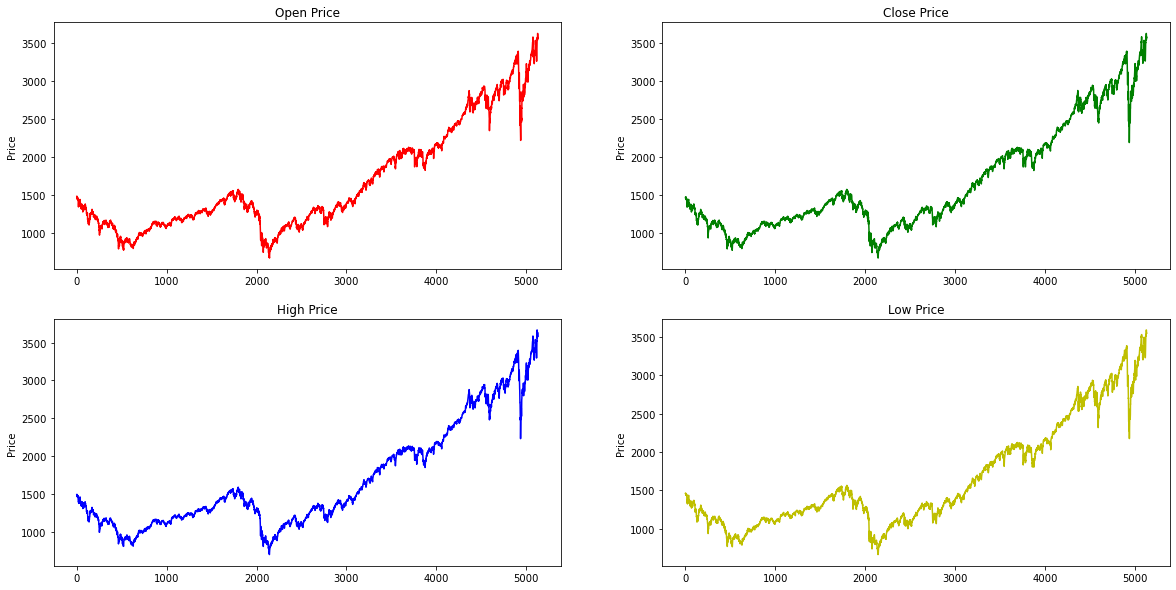

In [42]:
fig, dowjones_stocks_plots = plt.subplots(2,2,figsize=(20,10))

dowjones_stocks_plots[0,0].set_title("Open Price")
dowjones_stocks_plots[0,0].set_ylabel("Price")
dowjones_stocks_plots[0,0].plot(dowjones_stocks_cleaned.iloc[:,1], "r-")

dowjones_stocks_plots[0,1].set_title("Close Price")
dowjones_stocks_plots[0,1].set_ylabel("Price")
dowjones_stocks_plots[0,1].plot(dowjones_stocks_cleaned.iloc[:,4], "g-")

dowjones_stocks_plots[1,0].set_title("High Price")
dowjones_stocks_plots[1,0].set_ylabel("Price")
dowjones_stocks_plots[1,0].plot(dowjones_stocks_cleaned.iloc[:,2], "b-")

dowjones_stocks_plots[1,1].set_title("Low Price")
dowjones_stocks_plots[1,1].set_ylabel("Price")
dowjones_stocks_plots[1,1].plot(dowjones_stocks_cleaned.iloc[:,3], "y-")

### Data Formatting

## Model

In [12]:
df_length = len(dowjones_stocks_cleaned)
df_length

5131

In [13]:
train = int(df_length * 0.7)
val = df_length - train

print("Training dataset size: ", train)
print("Validation dataset size: ", val)

Training dataset size:  3591
Validation dataset size:  1540


In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
LSTM_model.add(LSTM(units=50))
LSTM_model.add(Dense(1))